In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
data_train = fetch_20newsgroups(subset="train")

data_test = fetch_20newsgroups(subset="test")

In [3]:
class2name = data_train.target_names 

print(class2name)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
X_train = data_train['data']
y_train = data_train['target']


X_test = data_test['data']
y_test = data_test['target']

In [5]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

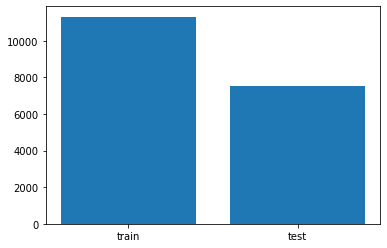

In [6]:
x = ("train", "test")
y = (len(X_train), len(X_test))

plt.bar(x, y)

In [7]:
explore_index = 5

In [8]:
#Explore target vector
print(y_train[explore_index])
print(X_train[explore_index])

16
From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagr

In [9]:
from collections import Counter

In [10]:
def explore_y(y):
    freq_classes = Counter(y)
    print(freq_classes)
    
    x = [class2name[i] for i in freq_classes.keys()]
    y = list(freq_classes.values())

    plt.bar(x, y)
    plt.xticks(rotation=90)


# Exploring train data - labels

Counter({10: 600, 15: 599, 8: 598, 9: 597, 11: 595, 7: 594, 13: 594, 14: 593, 5: 593, 2: 591, 12: 591, 3: 590, 6: 585, 1: 584, 4: 578, 17: 564, 16: 546, 0: 480, 18: 465, 19: 377})


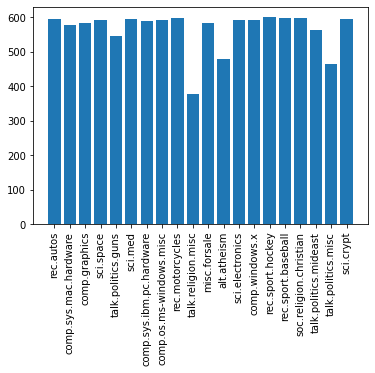

In [11]:
explore_y(y_train)

# Exploring test data - labels

Counter({10: 399, 15: 398, 8: 398, 9: 397, 7: 396, 13: 396, 11: 396, 5: 395, 2: 394, 14: 394, 12: 393, 3: 392, 6: 390, 1: 389, 4: 385, 17: 376, 16: 364, 0: 319, 18: 310, 19: 251})


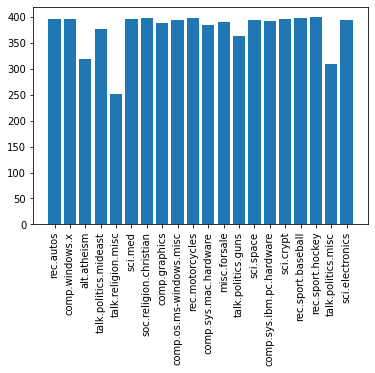

In [12]:
explore_y(y_test)

It is nice to have data in format which can be simple accessible -> convert to DataFrame.

In [13]:
import pandas as pd

In [14]:
def tranform_to_df(x, y):
    return pd.DataFrame({"text": x, "label": y})

In [15]:
train_df = tranform_to_df(X_train, y_train)
test_df = tranform_to_df(X_test, y_test)

In [16]:
train_df.head()

,text,label
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [23]:
test_df.head()

,text,label
0,From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...,7
1,From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...,5
2,From: mathew <mathew@mantis.co.uk>\nSubject: R...,0
3,From: bakken@cs.arizona.edu (Dave Bakken)\nSub...,17
4,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,19


In [127]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import re
import string
from itertools import chain
from nltk.corpus import stopwords

In [130]:
no_preprocessed_texts = train_df['text'].values

STOP_WORDS = stopwords.words('english')

In [131]:
STOP_WORDS

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [151]:
def plot_most_common(texts, most_common, count=None):
    counter_len = count
    tokenized = [t.split(" ") for t in texts[:counter_len]]
    tokenized_corpus = list(chain(*tokenized))
    freq = Counter(tokenized_corpus)
    MOST_COMMON = most_common
    common = freq.most_common(MOST_COMMON) 
    x, y = zip(*common)
    print(x)
    plt.bar(x, y)
    plt.xticks(rotation=90)


('', 'the', 'to', 'of', 'a', 'and', 'is', 'in', 'that', 'I')


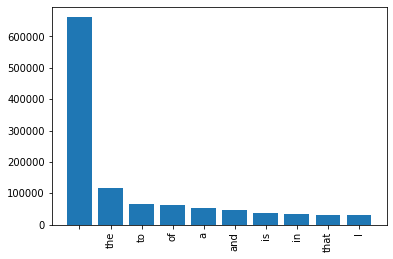

In [152]:
plot_most_common(no_preprocessed_texts, 10)

In [153]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [154]:
def preprocess_newsgroup(text):
    text = text.lower()
    
    table = str.maketrans('', '', string.punctuation) #every character is mapped to none (third argument)
    
    regex_to_remove = [
        r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)',
        r'subject:',
        r're:',
        r'from:'
        r'organization:',
        r'lines: ',        
    ]
    
    for r in regex_to_remove:
        text = re.sub(r, '', text)
        
    text = re.sub('\s', ' ', text)
    
    tokenized = text.split(' ')
    
    def process_word(word):
        word = word.translate(table)
        word = word.strip()
        return word
    
    tokenized = [process_word(token) for token in tokenized if token.isalpha() and token != '' and token not in STOP_WORDS]
    text = " ".join(tokenized)
    
    
    return text

In [155]:
text_preprocess = train_df['text'].values[0]
print(text_preprocess)
text_preprocess = preprocess_newsgroup(text_preprocess)
print(text_preprocess)

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





car university college park wondering anyone could enlighten car saw sports looked late early called doors really front bumper separate rest anyone tellme model engine years car whatever info funky looking please il brought neighborhood lerxst


In [156]:
preprocessed_text_key = 'preprocessed_text'

In [157]:
val = train_df['text'].values
train_df[preprocessed_text_key] = list(map(preprocess_newsgroup, val))

In [158]:
train_df.head()

,text,label,preprocessed_text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,car university college park wondering anyone c...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,si clock poll final call final call si clock r...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,e pb purdue university engineering computer ne...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,weitek harris computer systems division world ...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,shuttle launch question smithsonian astrophysi...


('would', 'one', 'article', 'like', 'x', 'people', 'get', 'university', 'know', 'think')


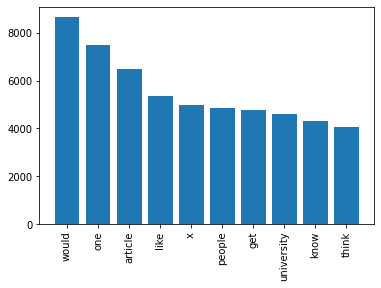

In [159]:
plot_most_common(train_df[preprocessed_text_key], 10)

In [160]:
tokenizer = Tokenizer()

In [161]:
tokenizer.fit_on_texts(train_df[preprocessed_text_key])

In [162]:
word_index = tokenizer.word_index

In [163]:
print(word_index)

{'would': 1, 'one': 2, 'article': 3, 'like': 4, 'x': 5, 'people': 6, 'get': 7, 'university': 8, 'know': 9, 'think': 10, 'use': 11, 'new': 12, 'also': 13, 'could': 14, 'good': 15, 'may': 16, 'even': 17, 'many': 18, 'make': 19, 'two': 20, 'see': 21, 'much': 22, 'time': 23, 'first': 24, 'want': 25, 'need': 26, 'anyone': 27, 'us': 28, 'way': 29, 'used': 30, 'go': 31, 'say': 32, 'world': 33, 'really': 34, 'going': 35, 'since': 36, 'something': 37, 'right': 38, 'still': 39, 'system': 40, 'find': 41, 'computer': 42, 'believe': 43, 'using': 44, 'take': 45, 'please': 46, 'must': 47, 'said': 48, 'might': 49, 'last': 50, 'never': 51, 'back': 52, 'work': 53, 'god': 54, 'got': 55, 'state': 56, 'without': 57, 'problem': 58, 'another': 59, 'well': 60, 'information': 61, 'number': 62, 'usa': 63, 'someone': 64, 'better': 65, 'sure': 66, 'made': 67, 'read': 68, 'government': 69, 'things': 70, 'space': 71, 'little': 72, 'help': 73, 'come': 74, 'give': 75, 'part': 76, 'file': 77, 'look': 78, 'every': 79, 